In [9]:
import numpy as np
from astropy.io import fits

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as mtick
import seaborn as sns


In [10]:
def define_plot_style():
    # Define plot paramters
    # Use seaborn style
    sns.set()
    
    plot_style = {
        'figure.figsize': (12,8),
        'figure.dpi': 200,
        'figure.autolayout':True,
        'lines.linewidth': 2,
        'lines.linestyle': '-',
        'lines.marker': 'o',
        'lines.markersize': 10,
        'legend.fontsize': 20,
        'legend.loc': 'best',
        'axes.titlesize': 24,
        'font.size': 22
    }
    mpl.rcParams.update(plot_style)

saving_folder = './../figures/'


In [11]:
# Load metrics
metrics_2k_path = './../data/metrics/wavediff-original/metrics-poly_sample_w_bis1_2k.npy'
wf_orifinal_metrics = np.load(metrics_2k_path, allow_pickle=True)[()]
metrics = wf_orifinal_metrics


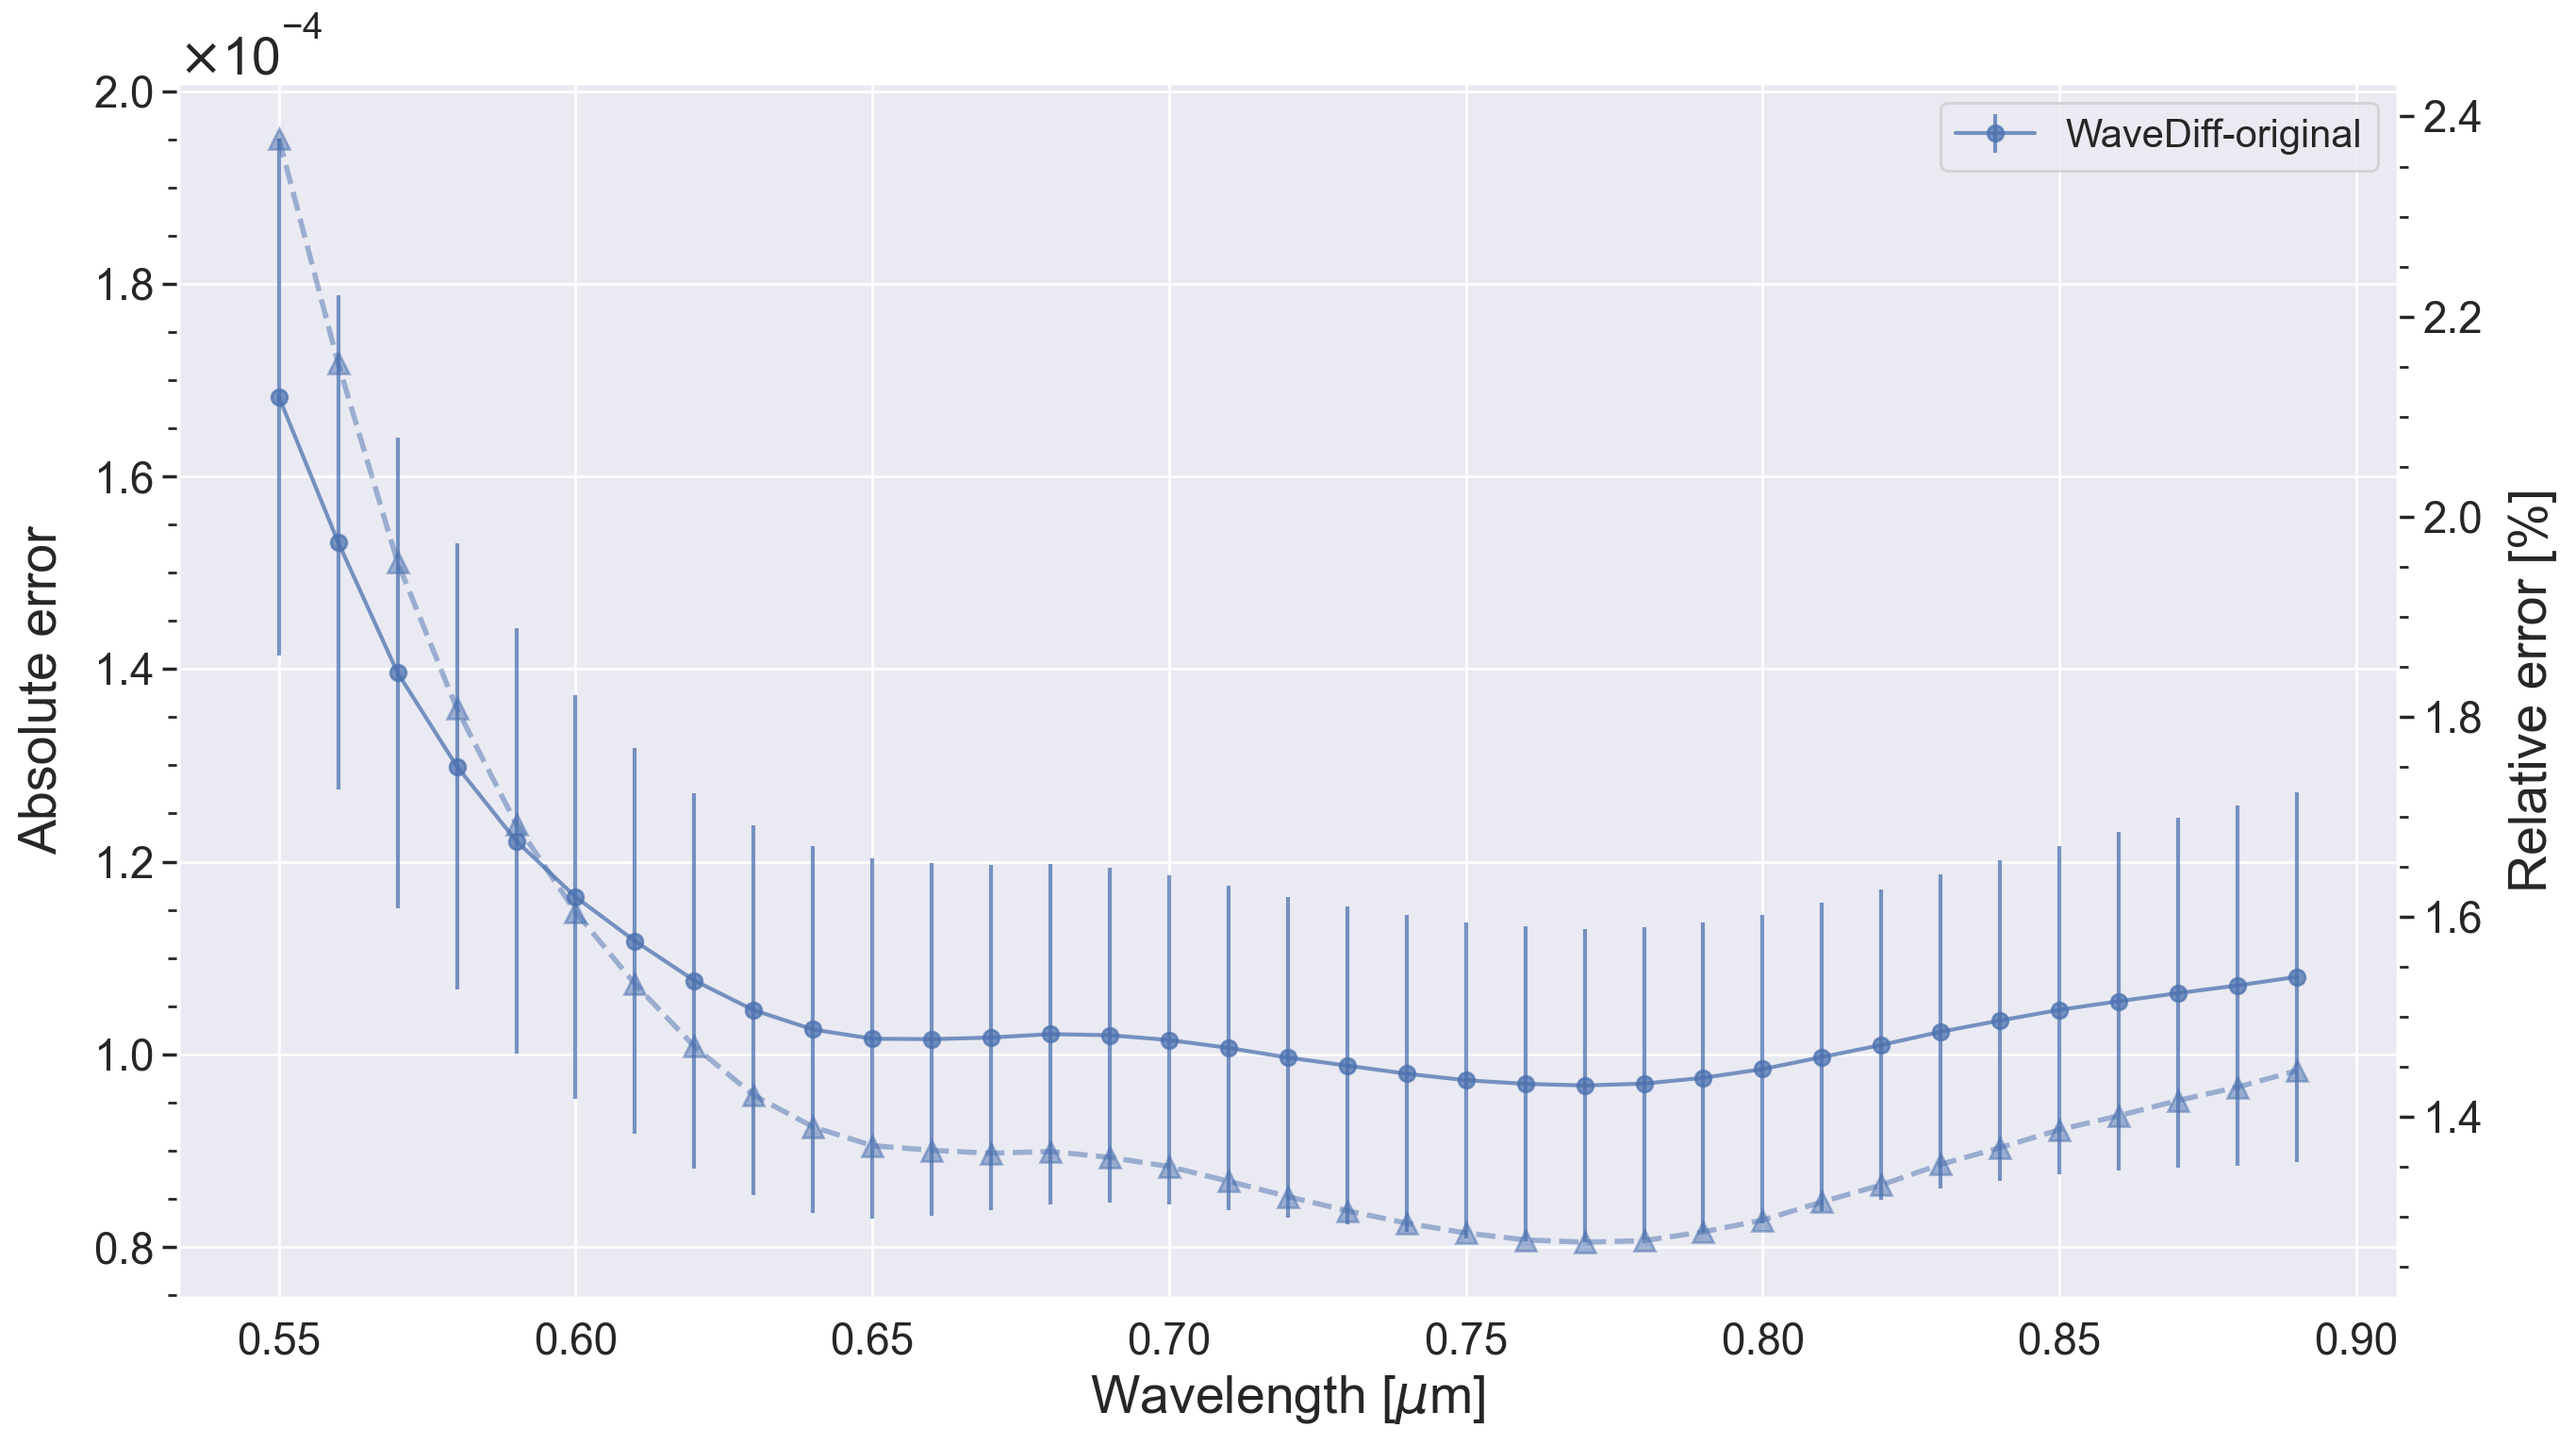

In [12]:
define_plot_style()
lambda_list = np.arange(0.55, 0.9, 0.01)
metrics = wf_orifinal_metrics

sns.set(font_scale=1.5)


# Monochromatic 
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(111)

ax1.errorbar(
    x = lambda_list,
    y = metrics['test_metrics']['mono_metric']['rmse_lda'],
    yerr = metrics['test_metrics']['mono_metric']['std_rmse_lda'],
    label='WaveDiff-original',
    alpha=0.75
)

plt.minorticks_on()
ax1.yaxis.major.formatter._useMathText = True
ax1.ticklabel_format(style='sci',scilimits=(0,0),axis='y')
ax1.yaxis.set_offset_position('left')
ax1.yaxis.offsetText.set(size=20)


ax1.legend(prop={'size': 15})
ax1.set_xlabel(r'Wavelength [$\mu$m]', fontsize = 20)
ax1.set_ylabel('Absolute error', fontsize = 20)
ax1.yaxis.set_label_coords(-0.05,0.5, transform=ax1.transAxes)

ax2 = ax1.twinx()
kwargs = dict(linewidth=2, linestyle='dashed', alpha=0.5, markersize=8, marker='^')

ax2.plot(
    lambda_list,
    metrics['test_metrics']['mono_metric']['rel_rmse_lda'],
    **kwargs
)
ax2.set_ylabel('Relative error [%]', fontsize = 20)
ax2.yaxis.set_label_coords(1.05,0.5, transform=ax2.transAxes)
ax2.grid(False)

plt.minorticks_on()
plt.savefig(saving_folder + 'WaveDiff-original_monochromatic.pdf')
plt.show()


In [13]:
# Mean error over the broad passband
print(
    ' Mean relative error over the broad passband: %.2f %%' %
    np.mean(metrics['test_metrics']['mono_metric']['rel_rmse_lda'])
)


 Mean relative error over the broad passband: 1.46 %
